## Fraud Detection

The original dataset can be accessed [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). For an in-depth overview, refer to the introduction article available [here](https://www.nicoletangsy.com/article/revisiting-machine-learning-fraud-detection).

---
#### Environment Set-up

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, average_precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

---
#### Data Understanding

In [28]:
df = pd.read_csv("creditcard.csv")

In [29]:
# hows the data looks like
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
# data size
print("DF Size:",df.shape)

for col_name, col_type in df.dtypes.items():

    # data type
    print(f"Column: {col_name} ({col_type})")

    # # data unique values
    # print(f"Unique Values: {df[col_name].nunique()}") 
    # print(f"Values Example: {df[col_name].unique()[:3]}") 

    # data min max
    print(f"Min. Values: {df[col_name].min()}") 
    print(f"Max. Values: {df[col_name].max()}") 

    # missing data
    print(f"NA Values: {df[df[col_name].isna()].shape[0]}")
    print('\n')

# V1 - 30 is after processing, so we need to consider perform similar processing for amount

DF Size: (284807, 31)
Column: Time (float64)
Min. Values: 0.0
Max. Values: 172792.0
NA Values: 0


Column: V1 (float64)
Min. Values: -56.407509631329
Max. Values: 2.45492999121121
NA Values: 0


Column: V2 (float64)
Min. Values: -72.7157275629303
Max. Values: 22.0577289904909
NA Values: 0


Column: V3 (float64)
Min. Values: -48.3255893623954
Max. Values: 9.38255843282114
NA Values: 0


Column: V4 (float64)
Min. Values: -5.68317119816995
Max. Values: 16.8753440335975
NA Values: 0


Column: V5 (float64)
Min. Values: -113.743306711146
Max. Values: 34.8016658766686
NA Values: 0


Column: V6 (float64)
Min. Values: -26.1605059358433
Max. Values: 73.3016255459646
NA Values: 0


Column: V7 (float64)
Min. Values: -43.5572415712451
Max. Values: 120.589493945238
NA Values: 0


Column: V8 (float64)
Min. Values: -73.2167184552674
Max. Values: 20.0072083651213
NA Values: 0


Column: V9 (float64)
Min. Values: -13.4340663182301
Max. Values: 15.5949946071278
NA Values: 0


Column: V10 (float64)
Min. Va

In [31]:
df['Class'].value_counts()
# Imbalance Dataset

Class
0    284315
1       492
Name: count, dtype: int64

---
#### Data Understanding & EDA 

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: xlabel='Time'>

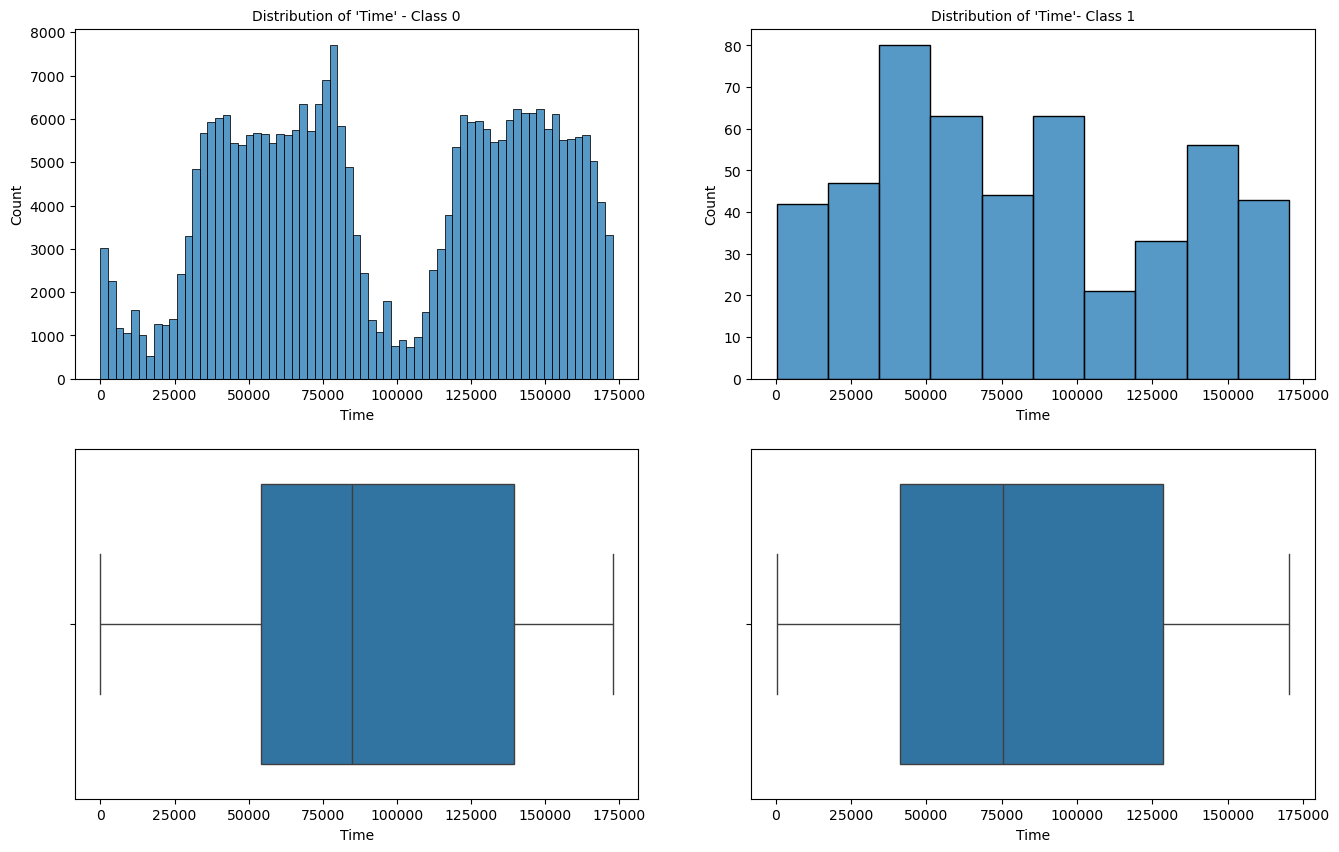

In [33]:
# Customer Data
f, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(x='Time', data=df[df['Class']==0], ax=axes[0,0]).set_title("Distribution of 'Time' - Class 0", fontsize=10)
sns.histplot(x='Time', data=df[df['Class']==1], ax=axes[0,1]).set_title("Distribution of 'Time'- Class 1", fontsize=10)
sns.boxplot(x='Time', data=df[df['Class']==0], ax=axes[1,0])
sns.boxplot(x='Time', data=df[df['Class']==1], ax=axes[1,1])

# 2 different distribution

<Axes: xlabel='Amount'>

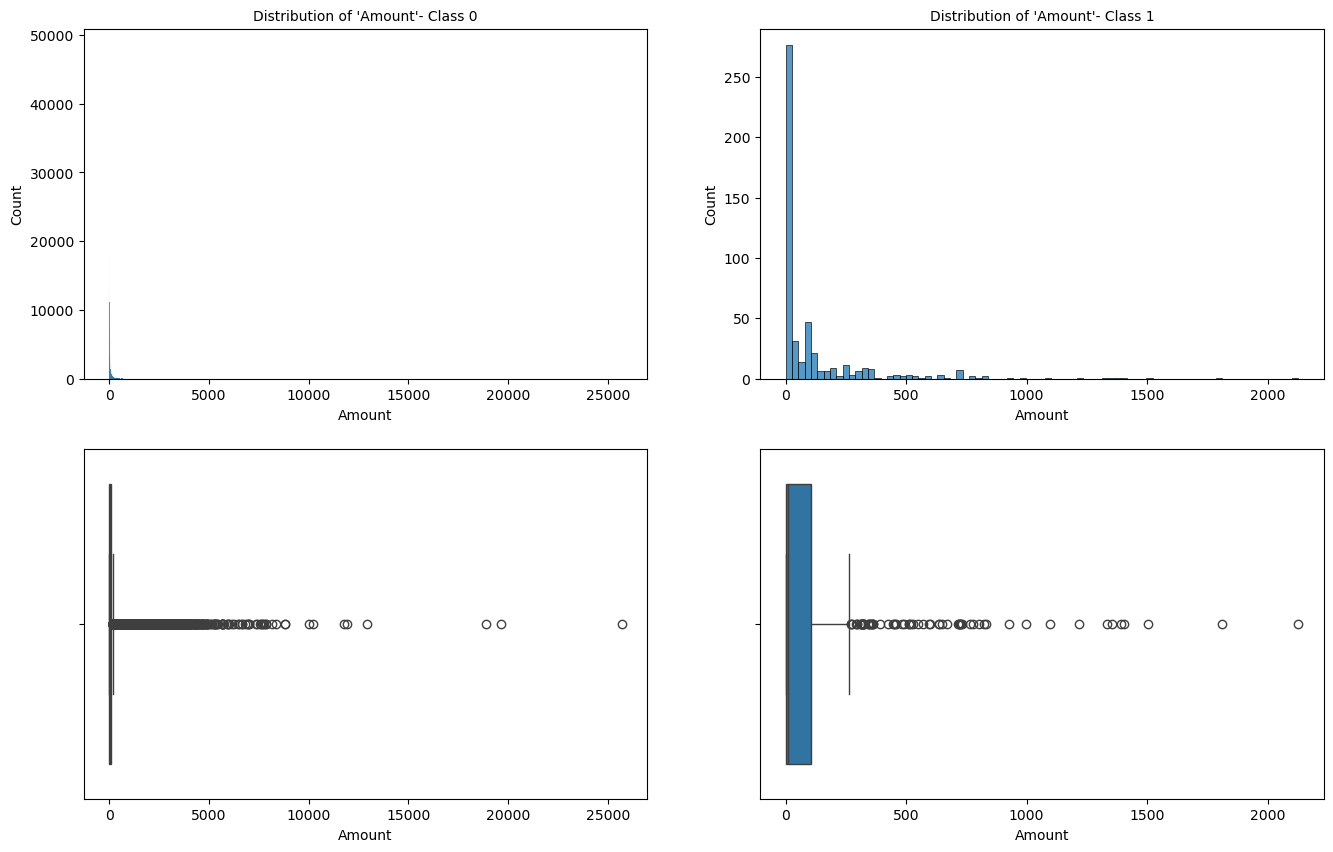

In [34]:
# Customer Data
f, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(x='Amount', data=df[df['Class']==0], ax=axes[0,0]).set_title("Distribution of 'Amount'- Class 0", fontsize=10)
sns.histplot(x='Amount', data=df[df['Class']==1], ax=axes[0,1]).set_title("Distribution of 'Amount'- Class 1", fontsize=10)
sns.boxplot(x='Amount', data=df[df['Class']==0], ax=axes[1,0])
sns.boxplot(x='Amount', data=df[df['Class']==1], ax=axes[1,1])

# skewed distribution, standardize

---
#### Feature Engineering & Correlation

In [35]:
df.corr()['Class'].sort_values()
# later we can ignore those features between -0.01 - +0.01

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

---
#### Baseline Model - Training
(Without Resampling & Feature section)

In [36]:
# Split the data into features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
# predict
y_pred = rf.predict(X_test)

---
#### Baseline Model - Evaluation

In [39]:
def evaluation_summary(test, pred):
    accuracy = accuracy_score(test, pred)
    print("Accuracy Score:", accuracy)

    auc_score = roc_auc_score(test, pred)
    print("AUC Score:", auc_score)

    f1 = f1_score(test, pred)
    print("f1 Score:", f1)

    ap_score  = average_precision_score(test, pred)
    print("AP Score:", ap_score)

In [40]:
evaluation_summary(y_test, y_pred)

Accuracy Score: 0.9995786664794073
AUC Score: 0.900917013786567
f1 Score: 0.8762886597938144
AP Score: 0.7749184095406387


---
#### Features Importances

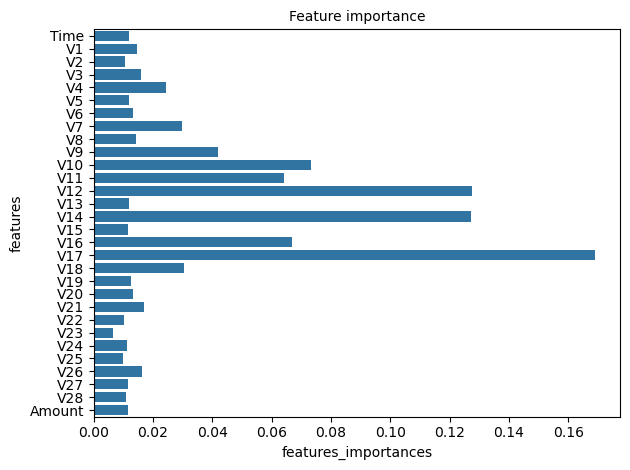

In [41]:
importances = rf.feature_importances_
feature_names = X_train.columns

forest_importances = pd.DataFrame(importances, index=feature_names).reset_index()
forest_importances.columns = ['features', 'features_importances']

fig, ax = plt.subplots()
sns.barplot(data=forest_importances, x='features_importances', y='features')
ax.set_title("Feature importance", fontsize=10)
fig.tight_layout()


---
#### Revised Model - Resampling

In [42]:
sm = SMOTETomek(random_state=42, tomek=TomekLinks(sampling_strategy='majority'))

X_res, y_res = sm.fit_resample(X_train, y_train)
y_train.value_counts(), y_res.value_counts()

(Class
 0    227459
 1       386
 Name: count, dtype: int64,
 Class
 1    227459
 0    226947
 Name: count, dtype: int64)

In [43]:
# train the model
rf = RandomForestClassifier()
rf.fit(X_res, y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
# predict
y_res_pred = rf.predict(X_test)
evaluation_summary(y_test, y_res_pred)

Accuracy Score: 0.9995786664794073
AUC Score: 0.9244579487138644
f1 Score: 0.8823529411764706
AP Score: 0.7800267496221228
